# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
test_response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={cities[0]}").json()
pprint(test_response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 64.8945, 'lon': -23.7142},
 'dt': 1660973060,
 'id': 3414079,
 'main': {'feels_like': 38.52,
          'grnd_level': 1000,
          'humidity': 82,
          'pressure': 1002,
          'sea_level': 1002,
          'temp': 46.53,
          'temp_max': 46.53,
          'temp_min': 46.53},
 'name': 'Olafsvik',
 'sys': {'country': 'IS', 'sunrise': 1660973814, 'sunset': 1661031600},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 11, 'gust': 29.62, 'speed': 22.73}}


In [3]:
weather_chk = []
base_url = "http://api.openweathermap.org/data/2.5/weather?"
for city_index in range(0, len(cities)):
    w_url = f"{base_url}appid={weather_api_key}&units=imperial&q={cities[city_index]}"
    response = requests.get(w_url).json()
    try:
        weather_chk.append(response)
        pprint(f"Processing city number {city_index}, {cities[city_index]}")
    except Exception as e:
        print(f"{cities[city_index]} does not have weather information.")
    

'Processing city number 0, ushuaia'
'Processing city number 1, kapaa'
'Processing city number 2, quatre cocos'
'Processing city number 3, rikitea'
'Processing city number 4, nuuk'
'Processing city number 5, nsanje'
'Processing city number 6, upernavik'
'Processing city number 7, usinsk'
'Processing city number 8, mataura'
'Processing city number 9, pemba'
'Processing city number 10, yellowknife'
'Processing city number 11, hermanus'
'Processing city number 12, polunochnoye'
'Processing city number 13, punta arenas'
'Processing city number 14, port elizabeth'
'Processing city number 15, lolua'
'Processing city number 16, ngukurr'
'Processing city number 17, necochea'
'Processing city number 18, saskylakh'
'Processing city number 19, vardo'
'Processing city number 20, tuktoyaktuk'
'Processing city number 21, nikolskoye'
'Processing city number 22, jackson'
'Processing city number 23, hobart'
'Processing city number 24, norman wells'
'Processing city number 25, cherskiy'
'Processing city 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_chk[0:2]

[{'coord': {'lon': -68.3, 'lat': -54.8},
  'weather': [{'id': 501,
    'main': 'Rain',
    'description': 'moderate rain',
    'icon': '10n'}],
  'base': 'stations',
  'main': {'temp': 35.26,
   'feels_like': 22.98,
   'temp_min': 35.26,
   'temp_max': 35.26,
   'pressure': 983,
   'humidity': 93},
  'visibility': 8000,
  'wind': {'speed': 25.32, 'deg': 230},
  'clouds': {'all': 100},
  'dt': 1661406053,
  'sys': {'type': 1,
   'id': 8303,
   'country': 'AR',
   'sunrise': 1661427100,
   'sunset': 1661463561},
  'timezone': -10800,
  'id': 3833367,
  'name': 'Ushuaia',
  'cod': 200},
 {'coord': {'lon': -159.319, 'lat': 22.0752},
  'weather': [{'id': 502,
    'main': 'Rain',
    'description': 'heavy intensity rain',
    'icon': '10n'}],
  'base': 'stations',
  'main': {'temp': 77.45,
   'feels_like': 78.8,
   'temp_min': 74.19,
   'temp_max': 82.38,
   'pressure': 1016,
   'humidity': 83},
  'visibility': 10000,
  'wind': {'speed': 8.05, 'deg': 290},
  'rain': {'1h': 8.38},
  'clouds':

In [16]:
print(len(weather_chk))
print(weather_chk[630]['coord']['lat'])

632
9.4092


In [19]:
w_lat = []
w_lng = []
max_temp = []
humidity = []
cloud = []
wind = []
country = []
w_date = []
w_cities = [] # Cities that have weather information

# loop through weather_chk list
for w in range(0, len(weather_chk)):
    try:
        w_lat.append(weather_chk[w]['coord']['lat'])
        w_lng.append(weather_chk[w]['coord']['lon'])
        max_temp.append(weather_chk[w]['main']['temp_max'])
        humidity.append(weather_chk[w]['main']['humidity'])
        cloud.append(weather_chk[w]['clouds']['all'])
        wind.append(weather_chk[w]['wind']['speed'])
        country.append(weather_chk[w]['sys']['country'])
        w_date.append(weather_chk[w]['dt'])
        w_cities.append(weather_chk[w]['name'])
    except Exception as e:
        print(f"{cities[w]} has no {e}")

city_weather_df = pd.DataFrame({
    "City": w_cities,
    "Lat":w_lat,
    "Lng":w_lng,
    "Max Temp":max_temp,
    "Humidity": humidity,
    "Cloudiness":cloud,
    "Wind Speed":wind,
    "Country": country,
    "Date":w_date})
city_weather_df.head()

lolua has no 'coord'
ngukurr has no 'coord'
tsihombe has no 'coord'
belushya guba has no 'coord'
mys shmidta has no 'coord'
samusu has no 'coord'
taolanaro has no 'coord'
jiddah has no 'coord'
deh rawud has no 'coord'
sinjah has no 'coord'
barentsburg has no 'coord'
illoqqortoormiut has no 'coord'
rolim de moura has no 'coord'
vaitupu has no 'coord'
tingrela has no 'coord'
sorvag has no 'coord'
kachikau has no 'coord'
saleaula has no 'coord'
amderma has no 'coord'
sahrak has no 'coord'
tumannyy has no 'coord'
haapu has no 'coord'
rungata has no 'coord'
nizhneyansk has no 'coord'
el wasta has no 'coord'
okandja has no 'coord'
bokspits has no 'coord'
tawkar has no 'coord'
attawapiskat has no 'coord'
marcona has no 'coord'
grand river south east has no 'coord'
phun phin has no 'coord'
suao has no 'coord'
nguiu has no 'coord'
grand centre has no 'coord'
scottsburgh has no 'coord'
hihifo has no 'coord'
sentyabrskiy has no 'coord'
macaboboni has no 'coord'
ondorhaan has no 'coord'
gorkovskoy

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,35.26,93,100,25.32,AR,1661406053
1,Kapaa,22.0752,-159.3190,82.38,83,100,8.05,US,1661406128
2,Quatre Cocos,-20.2078,57.7625,73.51,70,53,16.33,MU,1661406128
3,Rikitea,-23.1203,-134.9692,69.19,59,56,16.17,PF,1661406129
4,Nuuk,64.1835,-51.7216,45.21,87,75,24.16,GL,1661406129


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [20]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,19.910856,17.283177,69.204137,70.876923,54.160684,7.834462,1.661406e+09
std,33.131428,89.918871,12.827533,20.730212,37.880239,5.841809,9.284155e+01
min,-54.800000,-175.200000,32.230000,6.000000,0.000000,0.000000,1.661406e+09
25%,-7.470600,-63.057800,60.870000,58.000000,14.000000,3.440000,1.661406e+09
50%,22.813400,20.066700,70.770000,75.000000,59.000000,6.440000,1.661406e+09
75%,46.950000,97.611100,78.750000,87.000000,92.000000,10.650000,1.661406e+09
max,78.218600,178.416700,99.340000,100.000000,100.000000,36.750000,1.661406e+09


In [22]:
city_weather_df.to_csv("./city_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
# There is no city with humidity > 100%

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

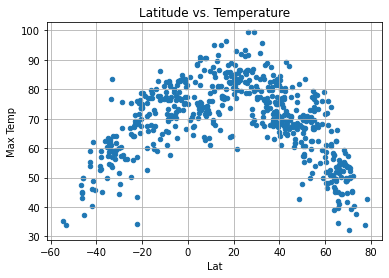

In [42]:
city_weather_df.plot(kind="scatter", x="Lat", y ="Max Temp", title="Latitude vs. Temperature", grid = True)
plt.savefig("Images/Weather-lat_temp_fig.png")

This plot is displaying the highest temperatures for cities based on their latitude. There seems to be a non-linear (quadratic) relationship between the latitude and the max temperature as it is forming a parabola. The closer the latitude is to 20, the higher the max temperature is. The peak of the temperatures is approximately when the latitude is between 20 and 40. 

## Latitude vs. Humidity Plot

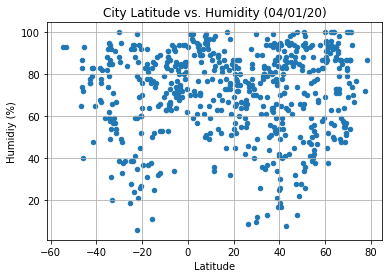

In [44]:
city_weather_df.plot(kind="scatter", x= 'Lat', y = "Humidity", title="City Latitude vs. Humidity (04/01/20)", grid=True)
plt.ylabel("Humidiy (%)")
plt.xlabel("Latitude")
plt.savefig("Images/Weather-lat_humidity.png")

This figure displays the latitude of the cities against the humidity. There does not seem to be any relationship between the latitude and humidity.

## Latitude vs. Cloudiness Plot

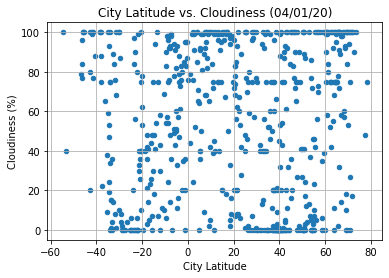

In [45]:
city_weather_df.plot(kind="scatter", x= 'Lat', y = "Cloudiness", title="City Latitude vs. Cloudiness (04/01/20)", grid=True)
plt.ylabel("Cloudiness (%)")
plt.xlabel("City Latitude")
plt.savefig("Images/Weather-lat_cloud.png")

There does not seem to be a relationship between the percentage of clouds and the latitude of the city.

## Latitude vs. Wind Speed Plot

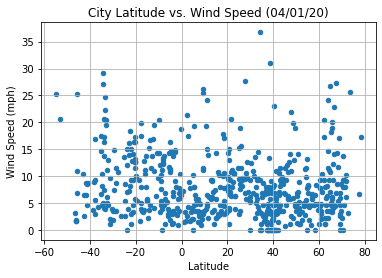

In [46]:
city_weather_df.plot(kind="scatter", x= 'Lat', y = "Wind Speed", title="City Latitude vs. Wind Speed (04/01/20)", grid=True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Images/Weather-lat_wind.png")

There is not relationship between the wind speed and the latitude of each city. However, the majority of wind speed is between 0 and 15 mph.

## Linear Regression

In [68]:
# Linear Regression Function
def plot_lin_regress(x_values, y_values, x_label, y_label, file_path_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values)+1,min(y_values)+1),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    plt.savefig(file_path_name)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.501519806635017


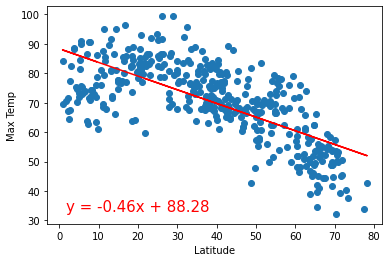

<Figure size 432x288 with 0 Axes>

In [69]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']>=0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']>=0,"Max Temp"], "Latitude", "Max Temp","Images/Weather-north-lat_temp.png")

There seems to be a negative relationship between the max temperature and the latitude for the Northern Hemisphere. As you get further away from the equator, the max temperature decreases. Nevertheless, based on the r-value of 0.5, this seems to be a poor model as only 50.15% of the variance in the data can be explained by this model.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5922913371657308


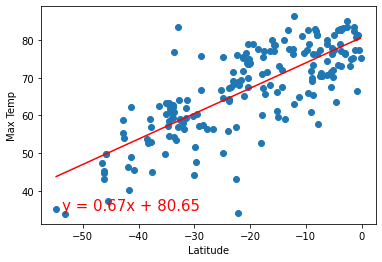

<Figure size 432x288 with 0 Axes>

In [70]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']<0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']<0,"Max Temp"], "Latitude", "Max Temp", "Images/Weather-south-lat_temp.png")

There seems to be a positive relationship between the latitude and max temperature for cities in the southern hemisphere. As the latitude increases, the temperature increases. Nevertheless, the model is fairly poor. It has an R-square of 59.22% which means that 59.22% of the variance in the data can be explained by this model.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00038779788167206576


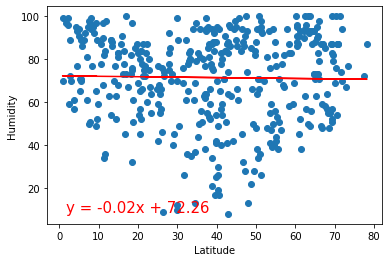

<Figure size 432x288 with 0 Axes>

In [71]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']>=0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']>=0,"Humidity"], "Latitude", "Humidity", "Images/Weather-north-lat_humidity.png")

There does not seem to be any relationship between the latitude and humidity of each city. The R-square value is extremely low at 0.03%. Therefore, 0.03% of the data can be explained by this model. Thus, this linear model would be a poor predictor of humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.005913206737023454


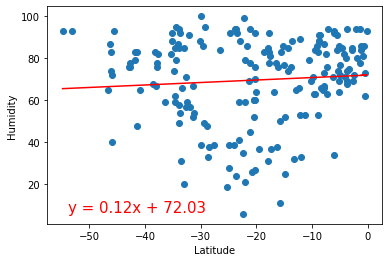

<Figure size 432x288 with 0 Axes>

In [73]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']<0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']<0,"Humidity"], "Latitude", "Humidity", "Images/Weather-south-lat_humidity.png")

There is a weak positive relationship between the latitude and humidity for southern cities; however it is not a strong one. The R-square value is low at 0.59%. Therefore, 0.59% of the data can be explained by this model. Thus, this linear model would be a poor predictor of humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0004927858842933419


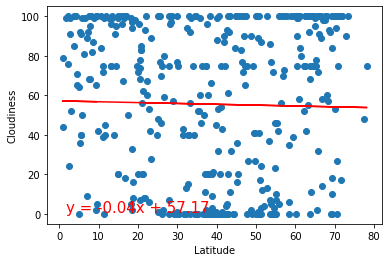

<Figure size 432x288 with 0 Axes>

In [74]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']>=0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']>=0,"Cloudiness"], "Latitude", "Cloudiness", "Images/Weather-north-lat_cloud.png")

There is no relationship between the latitude and percentage of clouds. The R-square value is extremely low at 0.05%. Therefore this would be a poor model to predict the percentage of clouds as only 0.05% of data can be explained by this model.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0010801799255162347


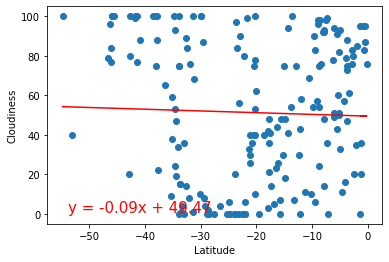

<Figure size 432x288 with 0 Axes>

In [75]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']<0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']<0,"Cloudiness"], "Latitude", "Cloudiness", "Images/Weather-south-lat_cloud.png")

There is no relationship between the latitude and percentage of clouds. The R-square value is extremely low at 0.11%. Therefore this would be a poor model to predict the percentage of clouds as only 0.11% of data can be explained by this model.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0008439549793780447


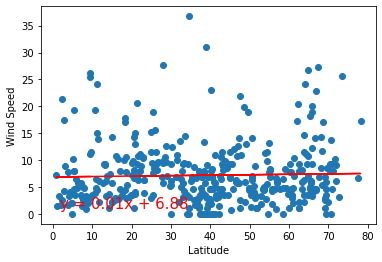

<Figure size 432x288 with 0 Axes>

In [76]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']>=0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']>=0,"Wind Speed"], "Latitude", "Wind Speed", "Images/Weather-north-lat_wind.png")

There is a no relationship between the latitude and percentage of clouds. The R-square value is extremely low at 0.08%. Therefore this would be a poor model to predict the wind speed as only 0.08% of data can be explained by this model.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01810854649058267


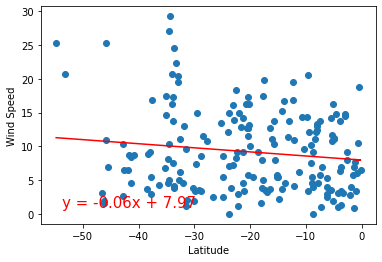

<Figure size 432x288 with 0 Axes>

In [77]:
plot_lin_regress(city_weather_df.loc[city_weather_df['Lat']<0, 'Lat'], city_weather_df.loc[city_weather_df['Lat']<0,"Wind Speed"], "Latitude", "Wind Speed", "Images/Weather-south-lat_wind.png")

There is no relationship between the latitude and the wind speed as the R-square value is low. R-sqaure is 1.81% which indicates that 1.18% of the data can be explained by the model. Thus, this model would not be a good model to use to predict wind speed.